# ICS 235
### Your Name: Zian Zeng


# Autoencoder network

In this project, we are going to re-use the TCGA dataset from homework \#4. We will see that neural network can also solve unsupervised problems. To do so, we are going to implement a simple autoencoder to extract 2 components from our  features (similar to PCA components). An autoencoder network takes as input some features, and tries to predict those same features. The architecture of the network will impose constraints which makes the recovery of the initial values not trivial. In our case, we will use a single hidden layer with 2 neurons: Thus, the network needs to encode the information from about 9000 selected features into 2 values, and then reconstruct as best as possible those ~9000 feature values from those 2 values (see figure below). Intuitively, if the network is accurate at reconstructing the original values, then the hidden layer should encode meaningful values about our samples.

<img src="autoencoder.png" width="400">

## Loading the data

In [3]:
import pandas as pd

X = pd.read_csv("data/tcga.csv", index_col=0, low_memory=False)
X = X.loc[:, X.std() > 1] # Filter the data
y = pd.read_csv("data/tcga_labels.csv", index_col=0).Class



> 1. Standardize the feature matrix <span style="color:red"></span>

In [4]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)


> 2. Apply PCA to the scaled data and do the scatter plot of the data transformed into the 2D space formed by the first 2 principal components. Color each sample according to their class labels. <span style="color:red"></span>

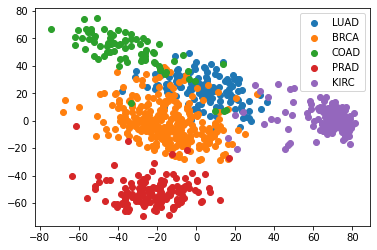

In [14]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_PCA = pca.fit_transform((X_standard))
                          
all_indices = np.arange(len(X_PCA))

for label in set(y):
    subset = all_indices[y == label]
    plt.scatter(X_PCA[subset, 0], X_PCA[subset, 1], label=label)

plt.legend()

> 3. Train a regression neural network with a 2-neuron hidden layer on the scaled data. Use the identity activation function and a random state of 42. 


In [ ]:

from sklearn.neural_network import MLPRegressor

input_size = X_standard.shape[1]
print(input_size)

MLP_reg = MLPRegressor(early_stopping=True, random_state=42, activation='identity', hidden_layer_sizes=2)
MLP_reg.fit(X_standard, X_standard)

"""
Since the input size is 9213, the parameters from input layer to the hidden layer is 9213 x 2 + 2 (bias connections) = 18428. 
Since the output features = input, 9213 x 2 + 9213 (bias connections) = 27639.
Therefore, the total number of parameters is 46067

"""

> 4. 1. Compute the hidden representation of each sample, which is a N_samples-by-2 dimensional array. 
   2. Plot the 2D representation of the data computed above and color them by cluster label. 

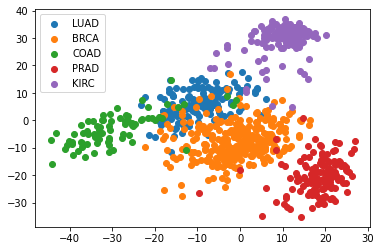

In [39]:

hidden_out = np.matmul(X_standard, MLP_reg.coefs_[0]) + MLP_reg.intercepts_[0]

all_indices = np.arange(len(hidden_out))

for label in set(y):
    subset = all_indices[y == label]
    plt.scatter(hidden_out[subset, 0], hidden_out[subset, 1], label=label)
plt.legend()